In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip
from scipy.stats import norm
from scipy.optimize import minimize

In [6]:
data = np.loadtxt("esb_process_tomography_20230105_1.txt")

In [7]:
data

array([[0.00000000e+00, 1.54900000e+03, 1.67295569e+09, ...,
        1.96620545e-04, 4.24811413e-04, 8.64486210e-05],
       [0.00000000e+00, 1.54900000e+03, 1.67295569e+09, ...,
        1.81615309e-04, 4.29068605e-04, 8.47827978e-05],
       [0.00000000e+00, 1.54900000e+03, 1.67295569e+09, ...,
        1.69318912e-04, 4.01396537e-04, 7.82057468e-05],
       ...,
       [1.00000000e+00, 1.55000000e+03, 1.67295933e+09, ...,
        2.81614106e-04, 1.46242295e-04, 3.91880953e-04],
       [1.00000000e+00, 1.55000000e+03, 1.67295933e+09, ...,
        2.26722623e-04, 1.85730576e-04, 3.71800270e-04],
       [1.00000000e+00, 1.55000000e+03, 1.67295933e+09, ...,
        2.68557691e-04, 1.70653409e-04, 4.12936351e-04]])

In [8]:
time_h_1549 = []
time_h_1549_2 = []
time_h_1549_4 = []
time_h_1549_6 = []
time_h_1549_8 = []
time_h_1550 = []
time_d_1549 = []
time_d_1549_2 = []
time_d_1549_4 = []
time_d_1549_6 = []
time_d_1549_8 = []
time_d_1550 = []

In [9]:
vh_h_1549 = []
vh_h_1549_2 = []
vh_h_1549_4 = []
vh_h_1549_6 = []
vh_h_1549_8 = []
vh_h_1550 = []
vh_d_1549 = []
vh_d_1549_2 = []
vh_d_1549_4 = []
vh_d_1549_6 = []
vh_d_1549_8 = []
vh_d_1550 = []

In [10]:
da_h_1549 = []
da_h_1549_2 = []
da_h_1549_4 = []
da_h_1549_6 = []
da_h_1549_8 = []
da_h_1550 = []
da_d_1549 = []
da_d_1549_2 = []
da_d_1549_4 = []
da_d_1549_6 = []
da_d_1549_8 = []
da_d_1550 = []

In [11]:
pd_h_1549 = []
pd_h_1549_2 = []
pd_h_1549_4 = []
pd_h_1549_6 = []
pd_h_1549_8 = []
pd_h_1550 = []
pd_d_1549 = []
pd_d_1549_2 = []
pd_d_1549_4 = []
pd_d_1549_6 = []
pd_d_1549_8 = []
pd_d_1550 = []

In [12]:
pa_h_1549 = []
pa_h_1549_2 = []
pa_h_1549_4 = []
pa_h_1549_6 = []
pa_h_1549_8 = []
pa_h_1550 = []
pa_d_1549 = []
pa_d_1549_2 = []
pa_d_1549_4 = []
pa_d_1549_6 = []
pa_d_1549_8 = []
pa_d_1550 = []

In [13]:
def extract_data(lh,ld,lt,la,ldp,d):
    vh = d[6]/d[3]
    pd = d[5]/(d[4]+d[5])
    pa = d[4]/(d[4]+d[5])
    lt.append(datetime.datetime.fromtimestamp(d[2]))
    lh.append(vh)
    ld.append((pd-pa)/(np.sin(2*np.arctan(vh))))
    ldp.append(pd)
    la.append(pa)

In [14]:
for i,d in enumerate(data):
    if d[0] == 0:
        if d[1] == 1549:
            extract_data(vh_h_1549,da_h_1549,time_h_1549,pa_h_1549,pd_h_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_h_1549_2,da_h_1549_2,time_h_1549_2,pa_h_1549_2,pd_h_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_h_1549_4,da_h_1549_4,time_h_1549_4,pa_h_1549_4,pd_h_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_h_1549_6,da_h_1549_6,time_h_1549_6,pa_h_1549_6,pd_h_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_h_1549_8,da_h_1549_8,time_h_1549_8,pa_h_1549_8,pd_h_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_h_1550,da_h_1550,time_h_1550,pa_h_1550,pd_h_1550,d)
    if d[0] == 1:
        if d[1] == 1549:
            extract_data(vh_d_1549,da_d_1549,time_d_1549,pa_d_1549,pd_d_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_d_1549_2,da_d_1549_2,time_d_1549_2,pa_d_1549_2,pd_d_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_d_1549_4,da_d_1549_4,time_d_1549_4,pa_d_1549_4,pd_d_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_d_1549_6,da_d_1549_6,time_d_1549_6,pa_d_1549_6,pd_d_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_d_1549_8,da_d_1549_8,time_d_1549_8,pa_d_1549_8,pd_d_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_d_1550,da_d_1550,time_d_1550,pa_d_1550,pd_d_1550,d)

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

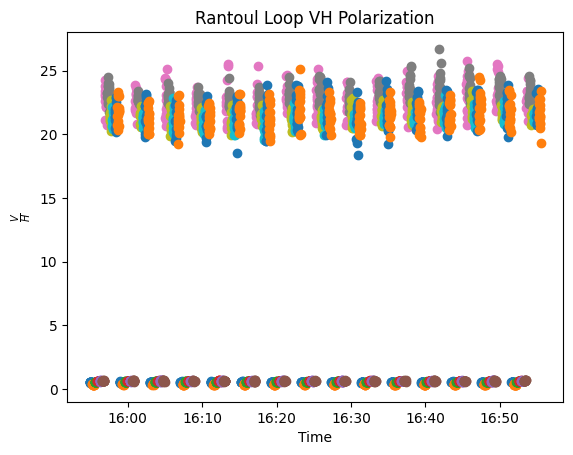

In [15]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_h_1549,vh_h_1549,label='H 1549',ls='',marker='o')
ax.plot(time_h_1549_2,vh_h_1549_2,label='H 1549.5',ls='',marker='o')
ax.plot(time_h_1549_4,vh_h_1549_4,label='H 1549.9',ls='',marker='o')
ax.plot(time_h_1549_6,vh_h_1549_6,label='H 1549.99',ls='',marker='o')
ax.plot(time_h_1549_8,vh_h_1549_8,label='H 1549.999',ls='',marker='o')
ax.plot(time_h_1550,vh_h_1550,label='H 1550',ls='',marker='o')
ax.plot(time_d_1549,vh_d_1549,label='D 1549',ls='',marker='o')
ax.plot(time_d_1549_2,vh_d_1549_2,label='D 1549.5',ls='',marker='o')
ax.plot(time_d_1549_4,vh_d_1549_4,label='D 1549.9',ls='',marker='o')
ax.plot(time_d_1549_6,vh_d_1549_6,label='D 1549.99',ls='',marker='o')
ax.plot(time_d_1549_8,vh_d_1549_8,label='D 1549.999',ls='',marker='o')
ax.plot(time_d_1550,vh_d_1550,label='D 1550',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
#ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

NameError: name 'time_h' is not defined

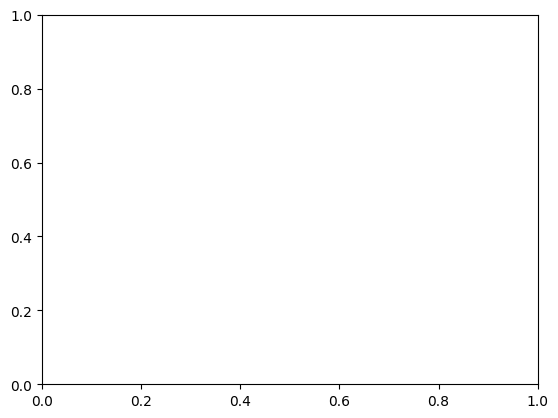

In [16]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_h[:num_points],vh_h[:num_points],label='H',ls='',marker='o')
ax.plot(time_d[:num_points],vh_d[:num_points],label='D',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [35]:
avg_vh_h_1549 = np.mean(np.array(vh_h_1549[:-1]).reshape(-1, 16), axis=1)
avg_vh_h_1549_2 = np.mean(np.array(vh_h_1549_2[:-1]).reshape(-1, 16), axis=1)
avg_vh_h_1549_4 = np.mean(np.array(vh_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_vh_h_1549_6 = np.mean(np.array(vh_h_1549_6[:-1]).reshape(-1, 16), axis=1)
avg_vh_h_1549_8 = np.mean(np.array(vh_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_vh_h_1550 = np.mean(np.array(vh_h_1550[:-2]).reshape(-1, 16), axis=1)
avg_vh_d_1549 = np.mean(np.array(vh_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_vh_d_1549_2 = np.mean(np.array(vh_d_1549_2).reshape(-1, 16), axis=1)
avg_vh_d_1549_4 = np.mean(np.array(vh_d_1549_4).reshape(-1, 16), axis=1)
avg_vh_d_1549_6 = np.mean(np.array(vh_d_1549_6).reshape(-1, 16), axis=1)
avg_vh_d_1549_8 = np.mean(np.array(vh_d_1549_8).reshape(-1, 16), axis=1)
avg_vh_d_1550 = np.mean(np.array(vh_d_1550).reshape(-1, 16), axis=1)

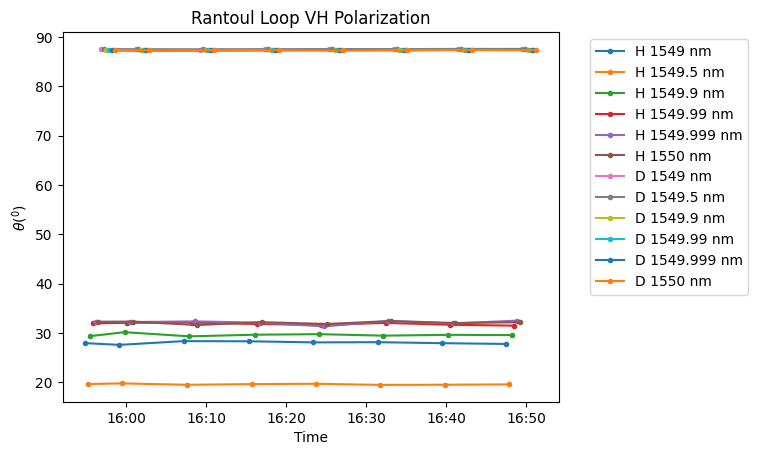

In [36]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

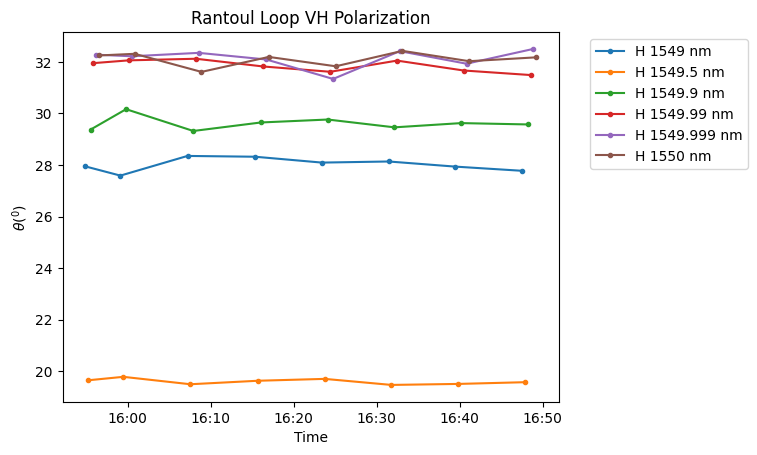

In [37]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

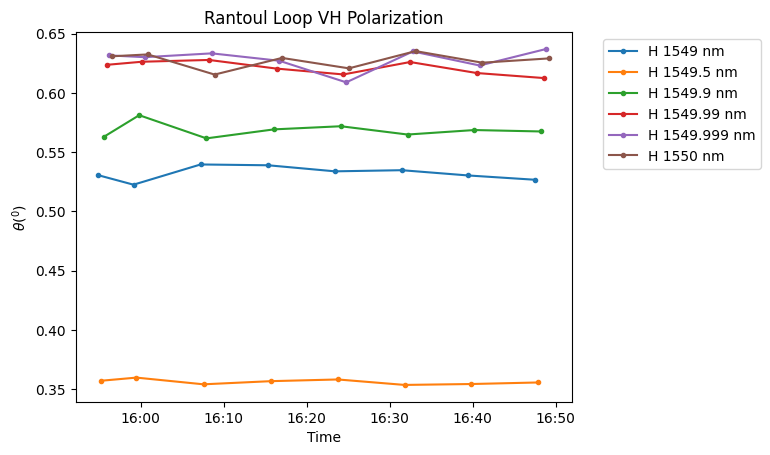

In [38]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_vh_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_vh_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_vh_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_vh_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_vh_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_vh_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

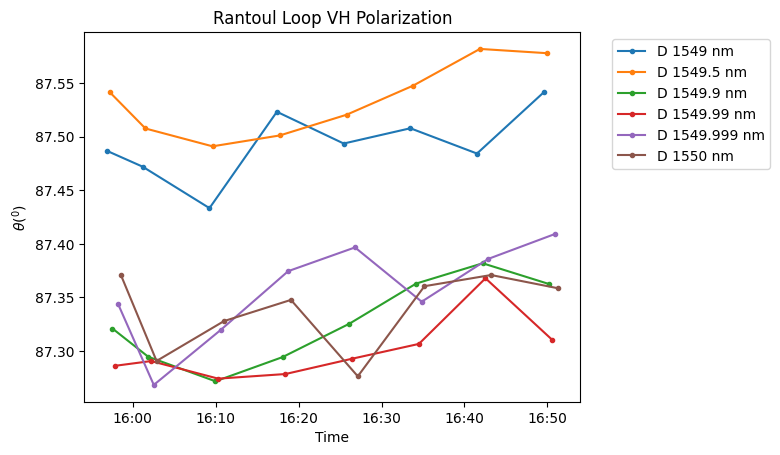

In [39]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [40]:
avg_da_h_1549 = np.mean(np.array(da_h_1549[:-1]).reshape(-1, 16), axis=1)
avg_da_h_1549_2 = np.mean(np.array(da_h_1549_2[:-1]).reshape(-1, 16), axis=1)
avg_da_h_1549_4 = np.mean(np.array(da_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_da_h_1549_6 = np.mean(np.array(da_h_1549_6[:-1]).reshape(-1, 16), axis=1)
avg_da_h_1549_8 = np.mean(np.array(da_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_da_h_1550 = np.mean(np.array(da_h_1550[:-2]).reshape(-1, 16), axis=1)
avg_da_d_1549 = np.mean(np.array(da_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_da_d_1549_2 = np.mean(np.array(da_d_1549_2).reshape(-1, 16), axis=1)
avg_da_d_1549_4 = np.mean(np.array(da_d_1549_4).reshape(-1, 16), axis=1)
avg_da_d_1549_6 = np.mean(np.array(da_d_1549_6).reshape(-1, 16), axis=1)
avg_da_d_1549_8 = np.mean(np.array(da_d_1549_8).reshape(-1, 16), axis=1)
avg_da_d_1550 = np.mean(np.array(da_d_1550).reshape(-1, 16), axis=1)

c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == "__main__":
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == "":
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packa

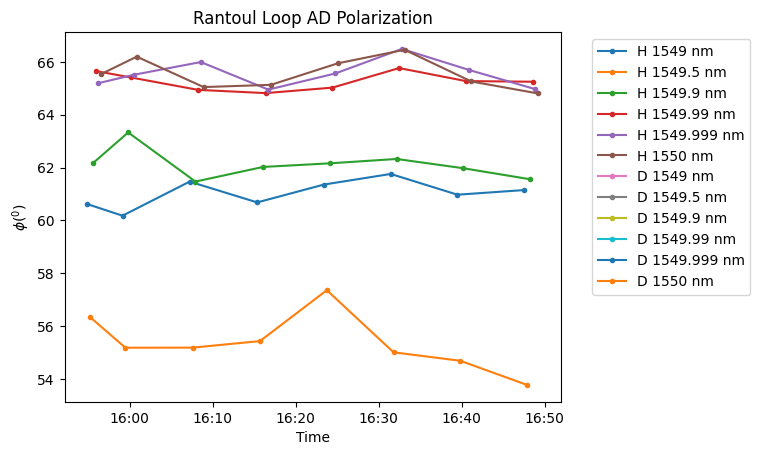

In [41]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],np.degrees(np.arccos(avg_da_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

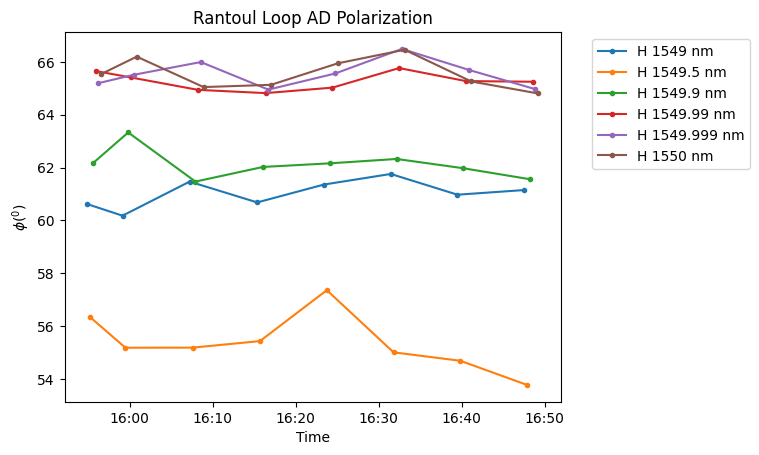

In [42]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],np.degrees(np.arccos(avg_da_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
c:\users\yujie4\pycharmprojects\processtmography\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning

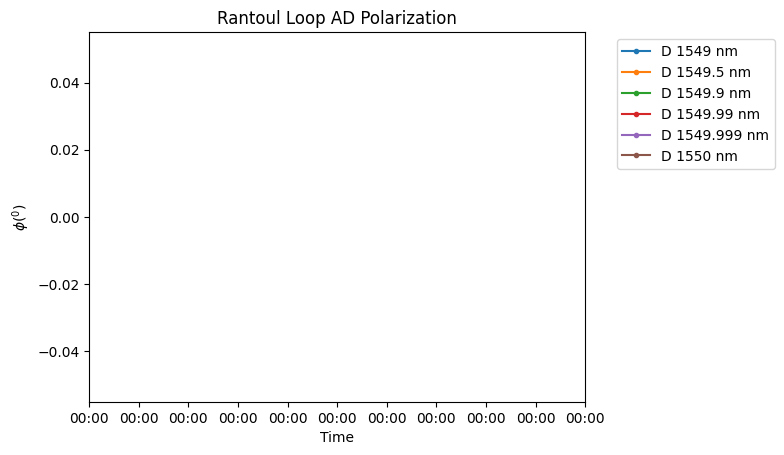

In [43]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

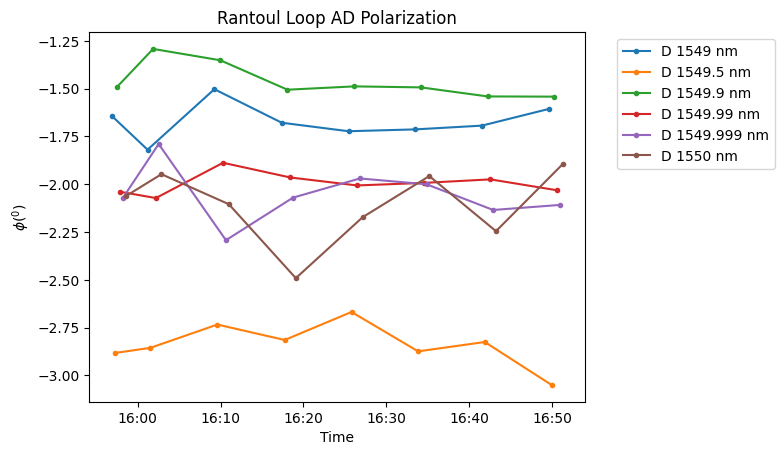

In [44]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_da_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_da_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_da_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_da_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_da_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_da_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [45]:
avg_pa_h_1549 = np.mean(np.array(pa_h_1549[:-1]).reshape(-1, 16), axis=1)
avg_pa_h_1549_2 = np.mean(np.array(pa_h_1549_2[:-1]).reshape(-1, 16), axis=1)
avg_pa_h_1549_4 = np.mean(np.array(pa_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_pa_h_1549_6 = np.mean(np.array(pa_h_1549_6[:-1]).reshape(-1, 16), axis=1)
avg_pa_h_1549_8 = np.mean(np.array(pa_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_pa_h_1550 = np.mean(np.array(pa_h_1550[:-2]).reshape(-1, 16), axis=1)
avg_pa_d_1549 = np.mean(np.array(pa_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_pa_d_1549_2 = np.mean(np.array(pa_d_1549_2).reshape(-1, 16), axis=1)
avg_pa_d_1549_4 = np.mean(np.array(pa_d_1549_4).reshape(-1, 16), axis=1)
avg_pa_d_1549_6 = np.mean(np.array(pa_d_1549_6).reshape(-1, 16), axis=1)
avg_pa_d_1549_8 = np.mean(np.array(pa_d_1549_8).reshape(-1, 16), axis=1)
avg_pa_d_1550 = np.mean(np.array(pa_d_1550).reshape(-1, 16), axis=1)

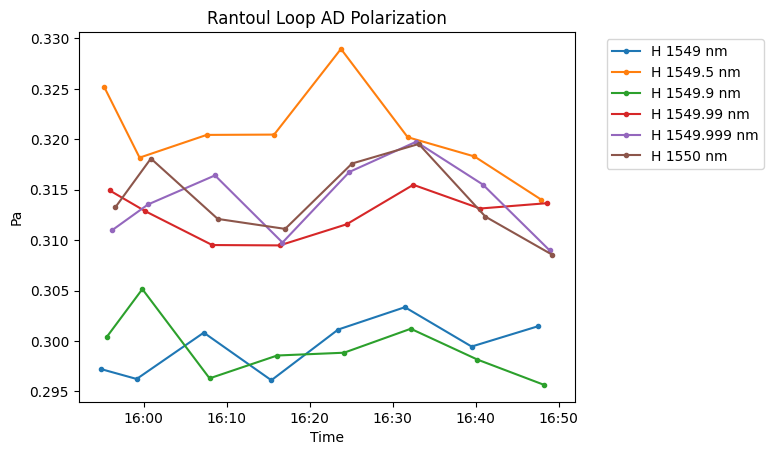

In [46]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_pa_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_pa_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_pa_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_pa_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_pa_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_pa_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pa")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

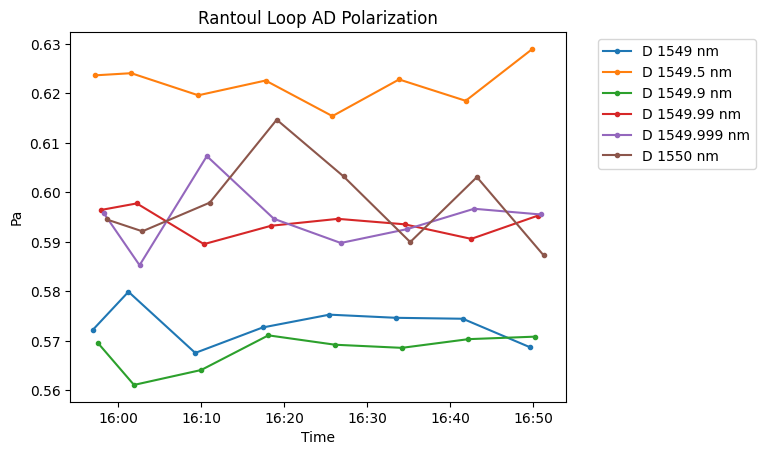

In [47]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_pa_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_pa_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_pa_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_pa_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_pa_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_pa_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pa")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [48]:
avg_pd_h_1549 = np.mean(np.array(pd_h_1549[:-1]).reshape(-1, 16), axis=1)
avg_pd_h_1549_2 = np.mean(np.array(pd_h_1549_2[:-1]).reshape(-1, 16), axis=1)
avg_pd_h_1549_4 = np.mean(np.array(pd_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_pd_h_1549_6 = np.mean(np.array(pd_h_1549_6[:-1]).reshape(-1, 16), axis=1)
avg_pd_h_1549_8 = np.mean(np.array(pd_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_pd_h_1550 = np.mean(np.array(pd_h_1550[:-2]).reshape(-1, 16), axis=1)
avg_pd_d_1549 = np.mean(np.array(pd_d_1549[:-1]).reshape(-1, 16), axis=1)
avg_pd_d_1549_2 = np.mean(np.array(pd_d_1549_2).reshape(-1, 16), axis=1)
avg_pd_d_1549_4 = np.mean(np.array(pd_d_1549_4).reshape(-1, 16), axis=1)
avg_pd_d_1549_6 = np.mean(np.array(pd_d_1549_6).reshape(-1, 16), axis=1)
avg_pd_d_1549_8 = np.mean(np.array(pd_d_1549_8).reshape(-1, 16), axis=1)
avg_pd_d_1550 = np.mean(np.array(pd_d_1550).reshape(-1, 16), axis=1)

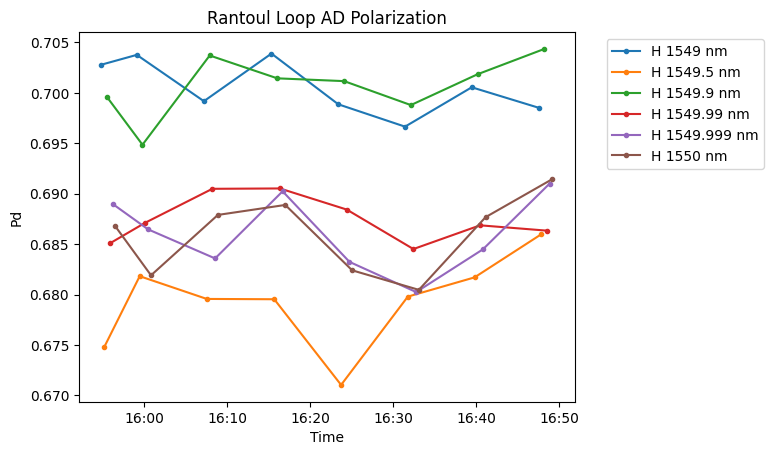

In [49]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_pd_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_pd_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_pd_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_pd_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_pd_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_pd_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pd")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

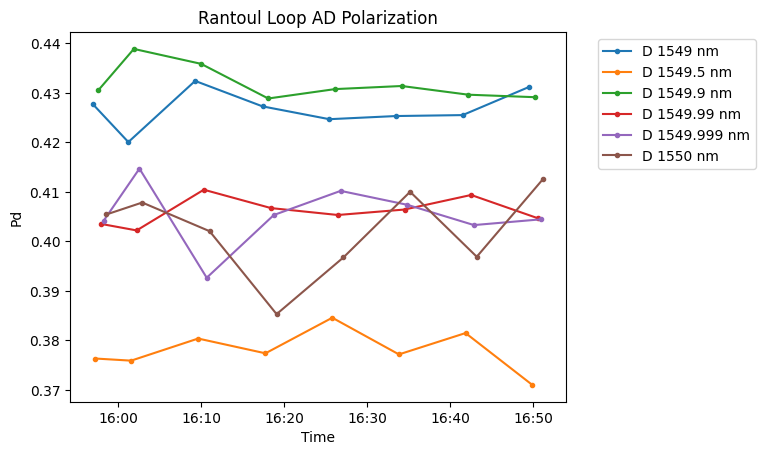

In [50]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_pd_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_pd_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_pd_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_pd_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_pd_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_pd_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pd")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [61]:
theta_h_1549 = []
theta_h_1549_2 = []
theta_h_1549_4 = []
theta_h_1549_6 = []
theta_h_1549_8 = []
theta_h_1550 = []
theta_d_1549 = []
theta_d_1549_2 = []
theta_d_1549_4 = []
theta_d_1549_6 = []
theta_d_1549_8 = []
theta_d_1550 = []

In [52]:
phi_h_1549 = []
phi_h_1549_2 = []
phi_h_1549_4 = []
phi_h_1549_6 = []
phi_h_1549_8 = []
phi_h_1550 = []
phi_d_1549 = []
phi_d_1549_2 = []
phi_d_1549_4 = []
phi_d_1549_6 = []
phi_d_1549_8 = []
phi_d_1550 = []

In [53]:
def fmle(params,*args):
        ph,pv,pd,pa=args
        theta,phi = params
        return -(np.log(np.cos(theta)**2)*ph+np.log(np.sin(theta)**2)*pa+np.log(1/2*(1+np.sin(2*theta)*np.cos(phi)))*pd+np.log(1/2*(1-np.sin(2*theta)*np.cos(phi)))*pa)

In [65]:
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_h_1549[i]+1),1-1/(avg_vh_h_1549[i]+1),avg_pd_h_1549[i],avg_pa_h_1549[i]))
    theta_h_1549.append(result.x[0]*(180/(np.pi)))
    phi_h_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_h_1549_2[i]+1),1-1/(avg_vh_h_1549_2[i]+1),avg_pd_h_1549_2[i],avg_pa_h_1549_2[i]))
    theta_h_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_4)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_h_1549_4[i]+1),1-1/(avg_vh_h_1549_4[i]+1),avg_pd_h_1549_4[i],avg_pa_h_1549_4[i]))
    theta_h_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_6)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_h_1549_6[i]+1),1-1/(avg_vh_h_1549_6[i]+1),avg_pd_h_1549_6[i],avg_pa_h_1549_6[i]))
    theta_h_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_8)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_h_1549_8[i]+1),1-1/(avg_vh_h_1549_8[i]+1),avg_pd_h_1549_8[i],avg_pa_h_1549_8[i]))
    theta_h_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1550)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_h_1550[i]+1),1-1/(avg_vh_h_1550[i]+1),avg_pd_h_1550[i],avg_pa_h_1550[i]))
    theta_h_1550.append(result.x[0]*(180/(np.pi)))
    phi_h_1550.append(result.x[1]*(180/(np.pi)))

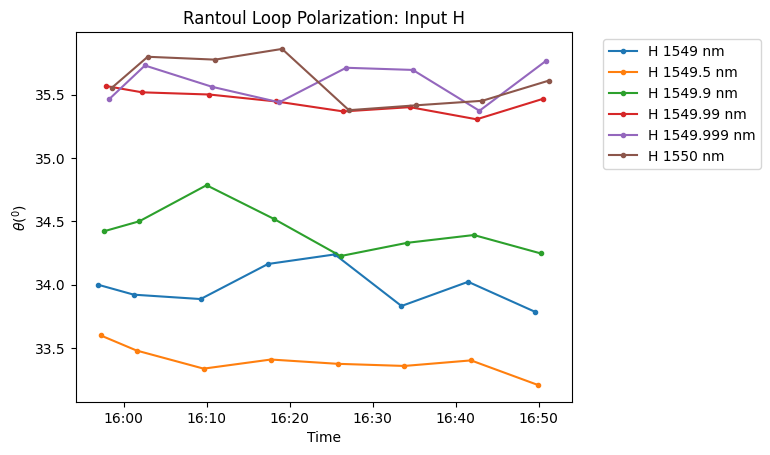

In [92]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],theta_h_1549[:8],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],theta_h_1549_2[:8],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],theta_h_1549_4[:8],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],theta_h_1549_6[:8],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],theta_h_1549_8[:8],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],theta_h_1550[:8],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input H")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

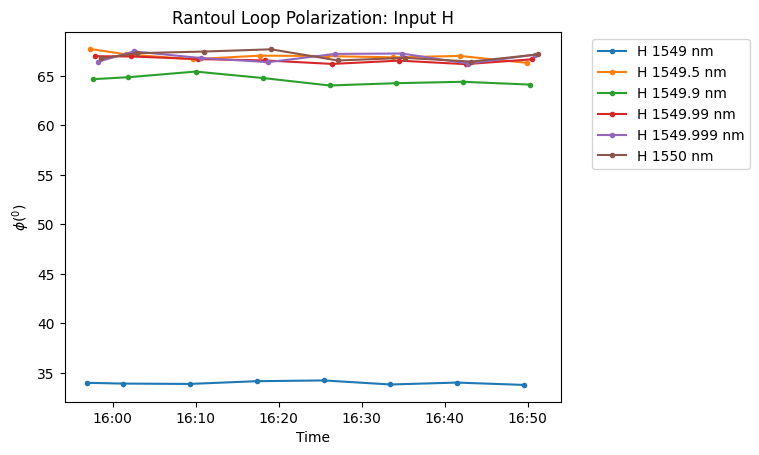

In [91]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],phi_h_1549[:8],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],phi_h_1549_2[:8],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],phi_h_1549_4[:8],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],phi_h_1549_6[:8],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],phi_h_1549_8[:8],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],phi_h_1550[:8],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input H")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [79]:
for i in range(len(avg_vh_d_1549)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_d_1549[i]+1),1-1/(avg_vh_d_1549[i]+1),avg_pd_d_1549[i],avg_pa_d_1549[i]))
    theta_d_1549.append(result.x[0]*(180/(np.pi)))
    phi_d_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_d_1549_2[i]+1),1-1/(avg_vh_d_1549_2[i]+1),avg_pd_d_1549_2[i],avg_pa_d_1549_2[i]))
    theta_d_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_4)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_d_1549_4[i]+1),1-1/(avg_vh_d_1549_4[i]+1),avg_pd_d_1549_4[i],avg_pa_d_1549_4[i]))
    theta_d_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_6)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_d_1549_6[i]+1),1-1/(avg_vh_d_1549_6[i]+1),avg_pd_d_1549_6[i],avg_pa_d_1549_6[i]))
    theta_d_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_8)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_d_1549_8[i]+1),1-1/(avg_vh_d_1549_8[i]+1),avg_pd_d_1549_8[i],avg_pa_d_1549_8[i]))
    theta_d_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1550)):
    x0=[1,1]
    result = minimize(fmle, x0,args=(1/(avg_vh_d_1550[i]+1),1-1/(avg_vh_d_1550[i]+1),avg_pd_d_1550[i],avg_pa_d_1550[i]))
    theta_d_1550.append(result.x[0]*(180/(np.pi)))
    phi_d_1550.append(result.x[1]*(180/(np.pi)))

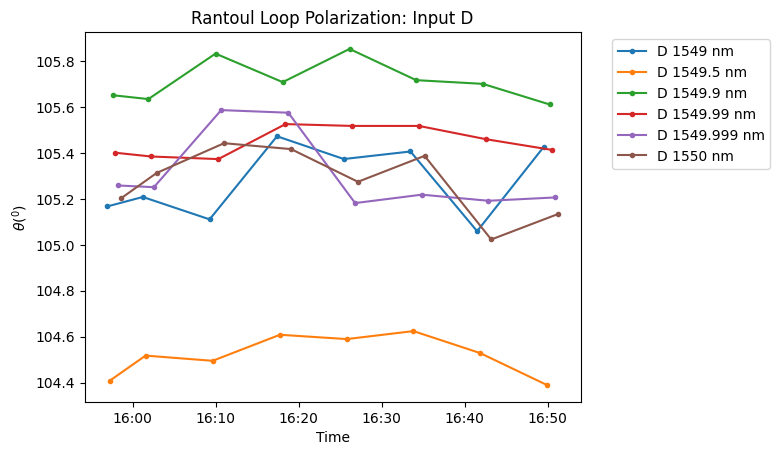

In [90]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],theta_d_1549[:8],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],theta_d_1549_2[:8],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],theta_d_1549_4[:8],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],theta_d_1549_6[:8],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],theta_d_1549_8[:8],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],theta_d_1550[:8],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input D")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

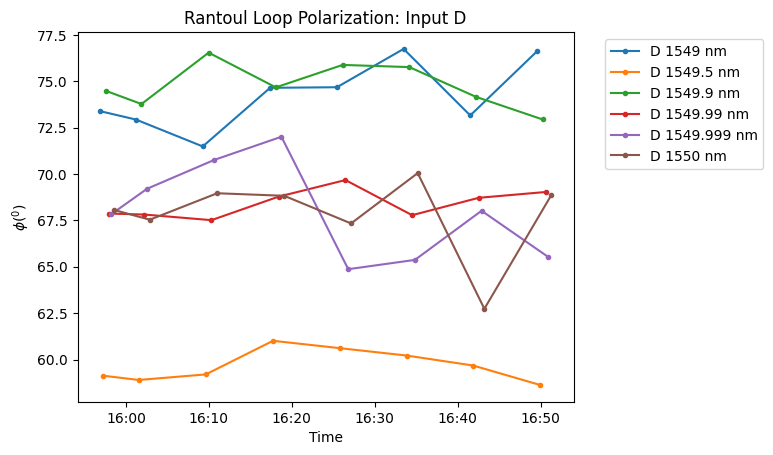

In [89]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],phi_d_1549[:8],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],phi_d_1549_2[:8],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],phi_d_1549_4[:8],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],phi_d_1549_6[:8],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],phi_d_1549_8[:8],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],phi_d_1550[:8],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input D")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')